In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from IPython.display import Markdown, display
import warnings
warnings.simplefilter('ignore')

# Read output datasets
final_hcris_data = pd.read_csv('/Users/sarinatan/Desktop/HLTH470hw2/submission1/data-code/output/HCRIS_Data.csv')

 1. How many hospitals filed more than one report in the same year? Show your answer as a line graph of the number of hospitals over time.

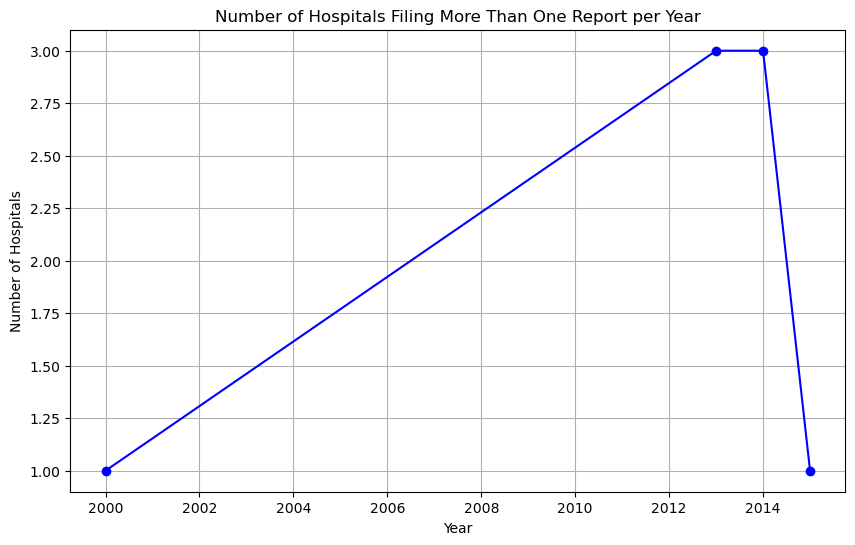

In [3]:
# Count the number of reports per hospital per year
report_counts = final_hcris_data.groupby(['year', 'provider_number']).size().reset_index(name='report_count')

# Filter hospitals that filed more than one report in the same year
multiple_reports = report_counts[report_counts['report_count'] > 1]

# Count the number of hospitals per year with multiple reports
hospitals_per_year = multiple_reports.groupby('year').size().reset_index(name='num_hospitals')

# Plot the result as a line graph
plt.figure(figsize=(10, 6))
plt.plot(hospitals_per_year['year'], hospitals_per_year['num_hospitals'], marker='o', linestyle='-', color='blue')
plt.title('Number of Hospitals Filing More Than One Report per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hospitals')
plt.grid(True)
plt.show()

2. After removing/combining multiple reports, how many unique hospital IDs (Medicare provider numbers) exist in the data?

In [4]:
# Count the number of unique hospitals with multiple reports per year
num_hospitals_multiple_reports = hospitals_per_year['num_hospitals'].sum()
print(num_hospitals_multiple_reports)

# Get the number of unique hospital IDs after combining multiple reports
unique_hospitals = final_hcris_data['provider_number'].nunique()
print(unique_hospitals)

8
9323


 3. What is the distribution of total charges (tot_charges in the data) in each year? 

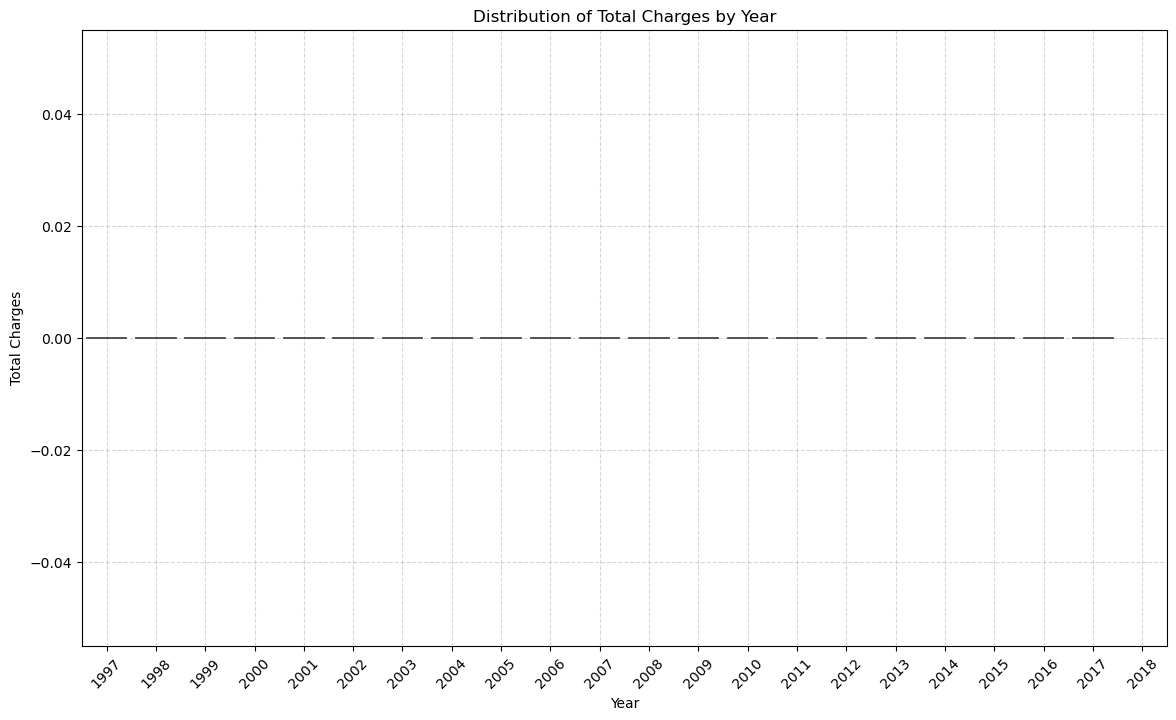

(8, 9323)

In [5]:
# Plot distribution of total charges by year using a violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='year', y='tot_charges', data=final_hcris_data, scale='width', inner='quartile', cut=0)
plt.title('Distribution of Total Charges by Year')
plt.xlabel('Year')
plt.ylabel('Total Charges')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

num_hospitals_multiple_reports, unique_hospitals

5. Calculate the average price among penalized versus non-penalized hospitals.


In [6]:
# Filter for 2012
df_2012 = final_hcris_data[final_hcris_data['year'] == 2012]

# Define penalty as whether the sum of HRRP and HVBP amounts is negative
df_2012['penalty'] = (df_2012['hrrp_payment'] + df_2012['hvbp_payment']) < 0

# Calculate estimated prices
df_2012['discount_factor'] = 1 - (df_2012['tot_discounts'] / df_2012['tot_charges'])
df_2012['price_num'] = (df_2012['ip_charges'] + df_2012['icu_charges'] + 
                        df_2012['ancillary_charges']) * df_2012['discount_factor'] - df_2012['tot_mcare_payment']
df_2012['price_denom'] = df_2012['tot_discharges'] - df_2012['mcare_discharges']
df_2012['estimated_price'] = df_2012['price_num'] / df_2012['price_denom']

# Remove negative prices and extreme outliers
df_cleaned = df_2012[(df_2012['estimated_price'] > 0) & 
                     (df_2012['estimated_price'] < df_2012['estimated_price'].quantile(0.99))]

# Calculate average price among penalized vs non-penalized hospitals
avg_price_penalty = df_cleaned.groupby('penalty')['estimated_price'].mean()

print(avg_price_penalty)

Series([], Name: estimated_price, dtype: float64)


6. Split hospitals into quartiles based on bed size. To do this, create 4 new indicator variables, where each variable is set to 1 if the hospital’s bed size falls into the relevant quartile. Provide a table of the average price among treated/control groups for each quartile.


In [ ]:
# Calculate estimated prices
df_2012['discount_factor'] = 1 - (df_2012['tot_discounts'] / df_2012['tot_charges'])
df_2012['price_num'] = (df_2012['ip_charges'] + df_2012['icu_charges'] + 
                        df_2012['ancillary_charges']) * df_2012['discount_factor'] - df_2012['tot_mcare_payment']
df_2012['price_denom'] = df_2012['tot_discharges'] - df_2012['mcare_discharges']
df_2012['estimated_price'] = df_2012['price_num'] / df_2012['price_denom']

# Remove negative prices and extreme outliers
df_cleaned = df_2012[(df_2012['estimated_price'] > 0) & 
                     (df_2012['estimated_price'] < df_2012['estimated_price'].quantile(0.99))]

# Drop rows with NaN bed values before calculating quartiles
df_cleaned = df_cleaned.dropna(subset=['beds'])

# Split hospitals into quartiles based on bed size
df_cleaned['bed_quartile'] = pd.qcut(df_cleaned['beds'], q=4, labels=[1, 2, 3, 4])

# Create indicator variables for each quartile
df_cleaned['Q1'] = (df_cleaned['bed_quartile'] == 1).astype(int)
df_cleaned['Q2'] = (df_cleaned['bed_quartile'] == 2).astype(int)
df_cleaned['Q3'] = (df_cleaned['bed_quartile'] == 3).astype(int)
df_cleaned['Q4'] = (df_cleaned['bed_quartile'] == 4).astype(int)

# Calculate the average price among treated/control groups for each quartile
result = df_cleaned.groupby(['bed_quartile', 'penalty'])['estimated_price'].mean().unstack()

print(result)

7. Find the average treatment effect using each of the following estimators, and present your results in a single table: 

Nearest neighbor matching (1-to-1) with inverse variance distance based on quartiles of bed size

Nearest neighbor matching (1-to-1) with Mahalanobis distance based on quartiles of bed size

Inverse propensity weighting, where the propensity scores are based on quartiles of bed size

Simple linear regression, adjusting for quartiles of bed size using dummy variables and appropriate interactions as discussed in class

I do not know

8. With these different treatment effect estimators, are the results similar, identical, very different?

I do not know 

9. Do you think you’ve estimated a causal effect of the penalty? Why or why not? (just a couple of sentences)

idk my data is NaN


10. Briefly describe your experience working with these data (just a few sentences). Tell me one thing you learned and one thing that really aggravated or surprised you.

 My experience working with this data was a bit frustrating. The data took a long time to load onto my laptop as well as processing to make the new cleaned csv files. One thing that I learned is that with a lot of data, there are also a lot of blanks that need to be filled in and/or removed while merging files together. While I was able to make the final HCRIS data pretty smoothly, it was aggravating to then see that there were still blanks and spots that said NaN that made me unable to analyze it. 
